In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm import tqdm
pd.set_option('max_columns',50)

In [2]:
plays = pd.read_csv('data/plays.csv')
data = pd.read_csv('data/all_tracking.csv')

In [3]:
plays.head(10)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,SHOTGUN,"2 RB, 3 TE, 0 WR",8.0,6.0,"6 DL, 3 LB, 2 DB",TRADITIONAL,0.0,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False
5,2018090600,320,(10:10) (Shotgun) N.Foles pass short left to N...,1,2,8,PHI,play_type_pass,PHI,4,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,4.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0.0,0.0,10:10:00,14.0,NaN,NaN,C,4,4,-0.344096,False
6,2018090600,344,(9:24) (Shotgun) N.Foles pass incomplete short...,1,3,4,PHI,play_type_pass,PHI,8,EMPTY,"1 RB, 2 TE, 2 WR",6.0,4.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0.0,0.0,09:24:00,18.0,NaN,NaN,I,0,0,-1.192208,False
7,2018090600,402,(9:08) M.Ryan pass incomplete deep left to M.S...,1,1,10,ATL,play_type_pass,PHI,44,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,09:08:00,54.0,NaN,NaN,I,0,0,-0.429863,False
8,2018090600,492,(7:01) M.Ryan pass short left to T.Coleman pus...,1,2,13,ATL,play_type_pass,PHI,36,SINGLEBACK,"1 RB, 2 TE, 2 WR",8.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,07:01:00,46.0,NaN,NaN,C,26,26,1.879804,False
9,2018090600,521,(6:19) M.Ryan pass short left to A.Hooper to P...,1,1,10,ATL,play_type_pass,PHI,10,SINGLEBACK,"1 RB, 2 TE, 2 WR",8.0,3.0,"4 DL, 2 LB, 5 DB",DESIGNED_ROLLOUT_LEFT,0.0,0.0,06:19:00,20.0,NaN,NaN,C,3,3,0.045665,False


In [4]:
def get_playId(plays,gameId):
    try:
        return plays[plays['gameId']==gameId]['playId'].values
    except Exception as e:
        print(e)

In [5]:
def get_plays(plays,gameId):
    try:
        return plays[plays['gameId']==gameId]
    except Exception as e:
        print(e)

In [6]:
def get_track_game(track,gameId):
    try:
        return track[track['gameId']==gameId]
    except Exception as e:
        print(e)

In [7]:
def get_track_play(track,playId):
    try:
        return track[track['playId']==playId]
    except Exception as e:
        print(e)

In [8]:
def get_track_team(track,team):
    try:
        return track[track['team']==team]
    except Exception as e:
        print(e)

In [9]:
def get_coord(track):
    try:
        c_x = {}
        c_y = {}
        for f in set(track['frameId']):
            c_x[f] = [x for x,x_f in zip(track['x'],track['frameId']) if x_f==f]
            c_y[f] = [y for y,y_f in zip(track['y'],track['frameId']) if y_f==f]

        return c_x,c_y
    except Exception as e:
        print(e)

In [10]:
def animate_play(playId,home_coord,away_coord,football_coord,plays):
    try:
        anim_fig,anim_ax = plt.subplots(figsize=(15,10))
        img = plt.imread('football_field_grayscale.png')
        anim_ax.imshow(img,extent=[0,120,0,53.34])

        h, = anim_ax.plot(home_coord.iloc[0]['h_x'],home_coord.iloc[0]['h_y'],'ro')
        a, = anim_ax.plot(away_coord.iloc[0]['a_x'],away_coord.iloc[0]['a_y'],'bo')
        f, = anim_ax.plot(football_coord.iloc[0]['f_x'],football_coord.iloc[0]['f_y'],'yo')

        def animate(i):
            h.set_data(home_coord.iloc[i]['h_x'],home_coord.iloc[i]['h_y'])
            a.set_data(away_coord.iloc[i]['a_x'],away_coord.iloc[i]['a_y'])
            f.set_data(football_coord.iloc[i]['f_x'],football_coord.iloc[i]['f_y'])

            return h,a,f,

        anim_ax.set_title(plays[plays['playId']==playId].iloc[0]['playDescription'])
        animation_gif = animation.FuncAnimation(anim_fig,animate,frames=range(1,len(home_coord.index)),interval=85)

        return animation_gif
    except Exception as e:
        print(e)

In [11]:
GAME_ID = 2018090600
PLAY_ID = 75
play_ids = get_playId(plays,GAME_ID)
event_game1 = get_plays(plays,GAME_ID)
track_game1 = get_track_game(data,GAME_ID)

In [12]:
track_game1.shape

(78994, 19)

In [13]:
track_game1

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-09-07T01:07:14.599Z,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,NaN
1,2018-09-07T01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,NaN
2,2018-09-07T01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH
3,2018-09-07T01:07:14.599Z,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,NaN
4,2018-09-07T01:07:14.599Z,90.78,36.15,0.00,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12.0,WR,1,away,2018090600,75,left,HITCH
5,2018-09-07T01:07:14.599Z,73.64,28.70,0.03,0.02,0.01,103.05,219.41,None,2534832.0,Rodney McLeod,23.0,FS,1,home,2018090600,75,left,NaN
6,2018-09-07T01:07:14.599Z,98.25,26.63,0.01,0.01,0.00,265.88,194.51,None,2543583.0,Devonta Freeman,24.0,RB,1,away,2018090600,75,left,NaN
7,2018-09-07T01:07:14.599Z,86.48,31.12,0.09,0.03,0.04,95.90,33.36,None,2552315.0,Jordan Hicks,58.0,MLB,1,home,2018090600,75,left,NaN
8,2018-09-07T01:07:14.599Z,82.67,20.53,0.03,0.07,0.01,81.14,174.57,None,2552689.0,Ronald Darby,21.0,CB,1,home,2018090600,75,left,NaN
9,2018-09-07T01:07:14.599Z,84.00,43.49,0.14,0.05,0.01,108.23,110.32,None,2555383.0,Jalen Mills,31.0,CB,1,home,2018090600,75,left,NaN


In [14]:
play_track_game1 = {}

for ids in tqdm(play_ids):
    play_track_game1[ids] = get_track_play(track_game1,ids)

100%|██████████| 89/89 [00:00<00:00, 527.35it/s]


In [15]:
play_track_game1.keys()

dict_keys([75, 146, 168, 190, 256, 320, 344, 402, 492, 521, 545, 636, 752, 776, 839, 889, 949, 992, 1037, 1061, 1085, 1202, 1295, 1344, 1423, 1473, 1546, 1568, 1628, 1680, 1750, 1779, 1801, 1869, 1894, 1916, 1940, 2055, 2094, 2116, 2260, 2360, 2382, 2450, 2474, 2503, 2575, 2624, 2648, 2693, 2736, 2764, 2811, 2980, 3004, 3066, 3095, 3181, 3203, 3257, 3279, 3392, 3481, 3507, 3678, 3791, 3815, 3844, 3904, 3928, 3950, 3979, 4142, 4166, 4207, 4239, 4258, 4282, 4306, 4325, 4366, 4395, 4417, 4472, 1226, 1715, 2305, 3626, 4439])

In [16]:
track_game1_play1 = get_track_play(track_game1,PLAY_ID)
home_track_game1 = get_track_team(track_game1_play1,'home')
away_track_game1 = get_track_team(track_game1_play1,'away')
football_track_game1 = get_track_team(track_game1_play1,'football')

In [17]:
home_coord_play1 = {}
away_coord_play1 = {}
football_coord_play1 = {}

home_coord_play1['h_x'],home_coord_play1['h_y'] = get_coord(home_track_game1)
away_coord_play1['a_x'],away_coord_play1['a_y'] = get_coord(away_track_game1)
football_coord_play1['f_x'],football_coord_play1['f_y'] = get_coord(football_track_game1)

home_coord_play1 = pd.DataFrame(home_coord_play1)
away_coord_play1 = pd.DataFrame(away_coord_play1)
football_coord_play1 = pd.DataFrame(football_coord_play1)

In [18]:
home_coord_play1

,h_x,h_y
1,"[88.89, 86.31, 73.64, 86.48, 82.67, 84.0, 85.63]","[36.47, 22.01, 28.7, 31.12, 20.53, 43.49, 26.59]"
2,"[88.89, 86.32, 73.64, 86.48, 82.68, 84.02, 85.64]","[36.47, 22.0, 28.7, 31.11, 20.53, 43.49, 26.61]"
3,"[88.88, 86.33, 73.63, 86.48, 82.68, 84.03, 85.65]","[36.47, 22.0, 28.69, 31.1, 20.53, 43.49, 26.63]"
4,"[88.89, 86.34, 73.63, 86.49, 82.67, 84.03, 85.65]","[36.48, 22.0, 28.69, 31.08, 20.52, 43.48, 26.64]"
5,"[88.9, 86.36, 73.63, 86.5, 82.67, 84.02, 85.66]","[36.49, 22.0, 28.69, 31.07, 20.52, 43.48, 26.66]"
6,"[88.9, 86.37, 73.62, 86.53, 82.66, 84.01, 85.67]","[36.5, 22.01, 28.69, 31.07, 20.51, 43.48, 26.67]"
7,"[88.9, 86.39, 73.62, 86.54, 82.66, 84.0, 85.67]","[36.5, 22.02, 28.7, 31.08, 20.5, 43.48, 26.7]"
8,"[88.89, 86.41, 73.62, 86.57, 82.65, 83.96, 85.68]","[36.5, 22.03, 28.7, 31.11, 20.5, 43.46, 26.71]"
9,"[88.89, 86.44, 73.61, 86.59, 82.65, 83.95, 85.69]","[36.5, 22.03, 28.7, 31.12, 20.5, 43.45, 26.73]"
10,"[88.89, 86.46, 73.61, 86.6, 82.64, 83.93, 85.7]","[36.5, 22.03, 28.7, 31.11, 20.5, 43.45, 26.74]"


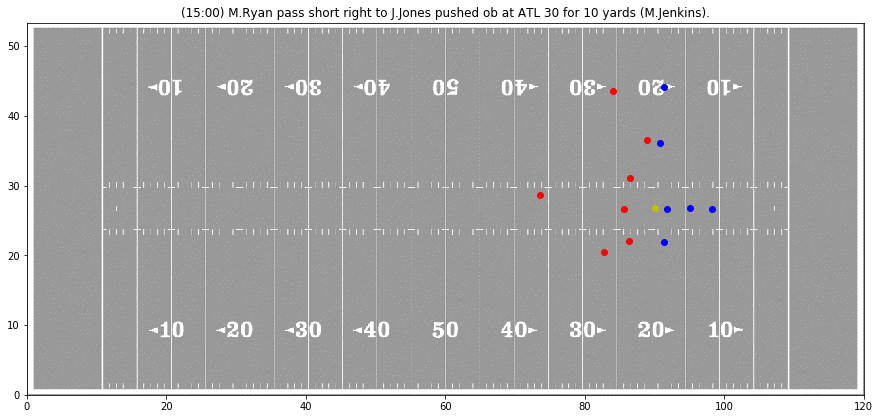

In [19]:
play1_gif = animate_play(PLAY_ID,home_coord_play1,away_coord_play1,football_coord_play1,plays)

In [20]:
type(play1_gif)

matplotlib.animation.FuncAnimation

In [21]:
home_coord_play1.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59],
           dtype='int64')

In [22]:
play1_gif.save(f"play_{track_game1_play1['gameId'].iloc[0]}_{track_game1_play1['playId'].iloc[0]}.mp4",writer='ffmpeg')